In [102]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import scipy.stats as stats
import pylab
import matplotlib.pyplot as plt
import seaborn as sns

# Data Normalization

In [103]:
# Data loading
titanic = pd.read_csv("Files/train.csv")
titanic.head()# Data description

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
# Describe
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [105]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [106]:
titanic_sample = titanic[['Age', 'Fare']]
titanic_sample.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


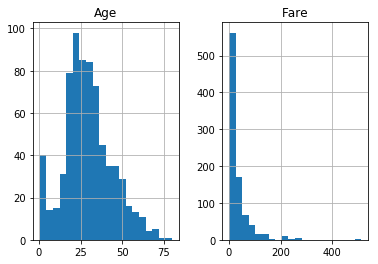

In [107]:
titanic_sample.hist(bins=20)
plt.show()
# Distribucion gaussiana, distribucion exponencial

In [108]:
# Filling Missing Data
titanic_sample.Age.fillna(titanic_sample.Age.median(), inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


# 1. Min-Max Normalization

In [109]:
"""
Steps to normalize variable
1. Create the object
2. Fit the data
3. TRansform the data
"""
# Object RobustScaler()
scaler = MinMaxScaler()

#Data fitting
scaler.fit(titanic_sample)

# Data transformation
titanic_sample_MinMax = scaler.transform(titanic_sample)


In [110]:
# Sample
scaler.transform([[80,200]])

array([[1.      , 0.390374]])

In [111]:
print("Mean: \n", titanic_sample_MinMax.mean(axis=0))
print("Std Dev: \n", titanic_sample_MinMax.std(axis=0))
print("Median: \n", np.median(titanic_sample_MinMax, axis=0))
print("Min: \n", titanic_sample_MinMax.min(axis=0))
print("Max: \n", titanic_sample_MinMax.max(axis=0))

Mean: 
 [0.3636791  0.06285843]
Std Dev: 
 [0.1635133  0.09694067]
Median: 
 [0.34656949 0.02821272]
Min: 
 [0. 0.]
Max: 
 [1. 1.]


In [112]:
def plots(df1, df2, column):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    df1.hist(bins=20, grid=False)
    plt.title("Original data")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    plt.subplot(1,2,2)
    #df2.hist(bins=20)
    plt.hist(df2, bins= 20)
    plt.title("Normalized data")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    plt.figure(figsize=(5,5))
    sns.jointplot(df1, df2)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


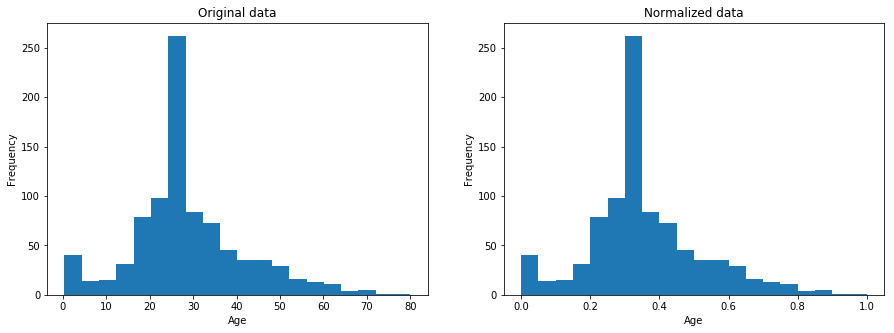

<Figure size 360x360 with 0 Axes>

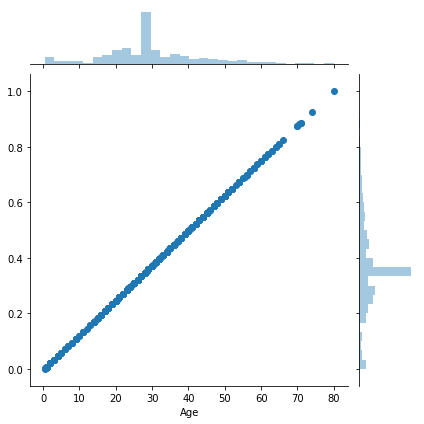

In [113]:
# Plotting data
plots(titanic_sample.Age, titanic_sample_MinMax[:,0], "Age")

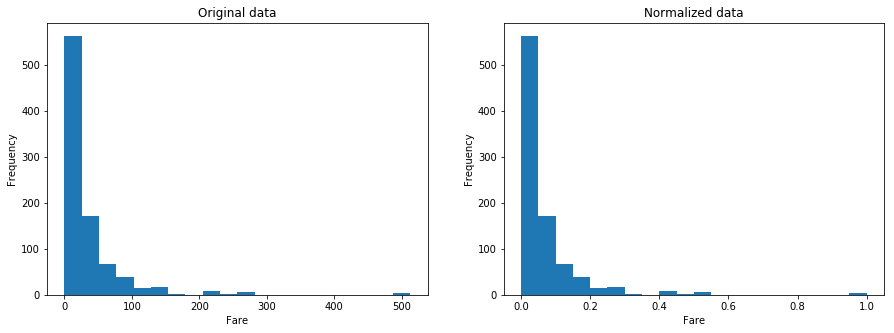

<Figure size 360x360 with 0 Axes>

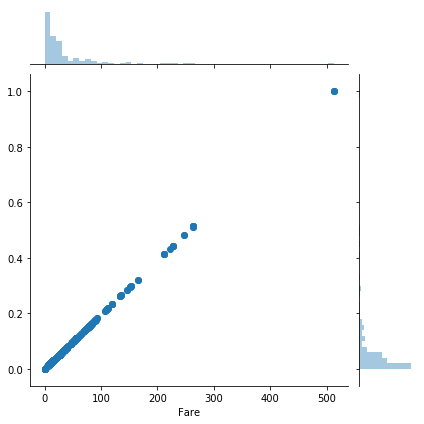

In [114]:
plots(titanic_sample.Fare, titanic_sample_MinMax[:,1], "Fare")

In [115]:
# Make Standart and Robust

# 2. Robust Normalization

In [116]:

"""
Steps to normalize variable
1. Create the object
2. Fit the data
3. TRansform the data
"""
# Object 
scaler1 = RobustScaler()

#Data fitting
scaler1.fit(titanic_sample)

# Data transformation
titanic_sample_Robust = scaler1.transform(titanic_sample)

In [117]:
# Sample
scaler1.transform([[80,200]])

array([[4.        , 8.03590361]])

In [118]:
print("Mean: \n", titanic_sample_Robust.mean(axis=0))
print("Std Dev: \n", titanic_sample_Robust.std(axis=0))
print("Median: \n", np.median(titanic_sample_Robust, axis=0))
print("Min: \n", titanic_sample_Robust.min(axis=0))
print("Max: \n", titanic_sample_Robust.max(axis=0))

Mean: 
 [0.10473711 0.76874471]
Std Dev: 
 [1.00095294 2.15099155]
Median: 
 [0. 0.]
Min: 
 [-2.12153846 -0.62600478]
Max: 
 [ 4.        21.5627382]


In [119]:
def plots(df1, df2, column):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    df1.hist(bins=20, grid=False)
    plt.title("Original data")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    plt.subplot(1,2,2)
    #df2.hist(bins=20)
    plt.hist(df2, bins= 20)
    plt.title("Normalized data")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    plt.figure(figsize=(5,5))
    sns.jointplot(df1, df2)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


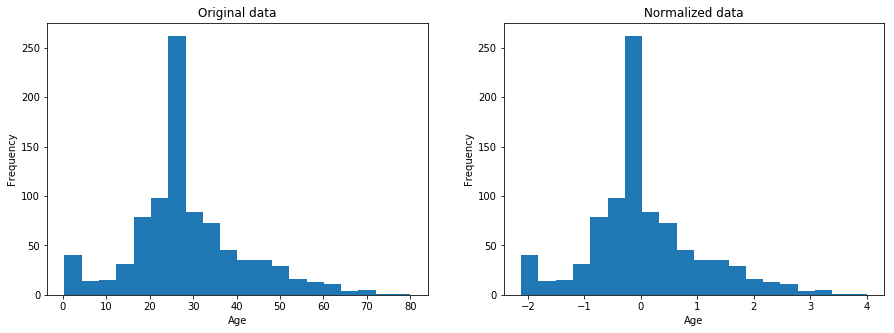

<Figure size 360x360 with 0 Axes>

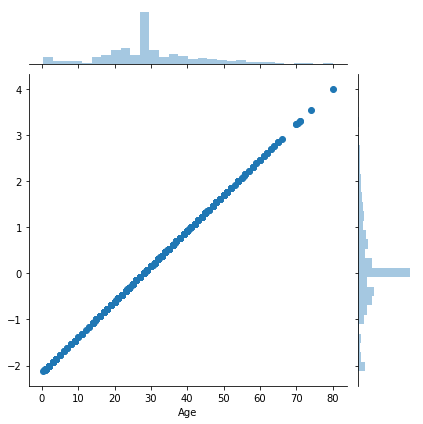

In [120]:
# Plotting data
plots(titanic_sample.Age, titanic_sample_Robust[:,0], "Age")

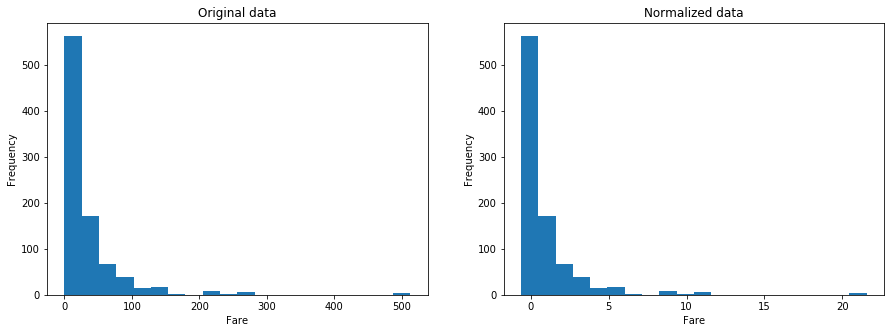

<Figure size 360x360 with 0 Axes>

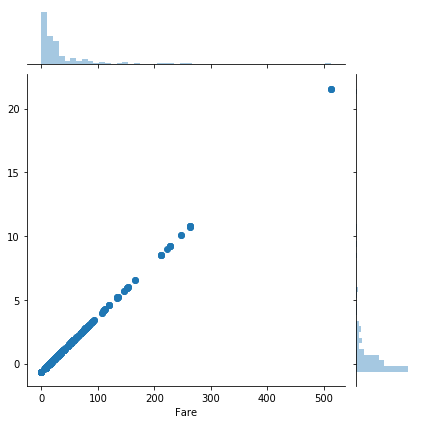

In [121]:
plots(titanic_sample.Fare, titanic_sample_Robust[:,1], "Fare")

# 3. Standard Scaler Normalization

In [126]:

"""
Steps to normalize variable
1. Create the object
2. Fit the data
3. TRansform the data
"""
# Object 
scaler2 = StandardScaler()

#Data fitting
scaler2.fit(titanic_sample)

# Data transformation
titanic_sample_StandardScaler = scaler2.transform(titanic_sample)

In [127]:
# Sample
scaler2.transform([[80,200]])

array([[3.89155445, 3.37851578]])

In [128]:
print("Mean: \n", titanic_sample_StandardScaler.mean(axis=0))
print("Std Dev: \n", titanic_sample_StandardScaler.std(axis=0))
print("Median: \n", np.median(titanic_sample_StandardScaler, axis=0))
print("Min: \n", titanic_sample_StandardScaler.min(axis=0))
print("Max: \n", titanic_sample_StandardScaler.max(axis=0))

Mean: 
 [2.27277979e-16 3.98733297e-18]
Std Dev: 
 [1. 1.]
Median: 
 [-0.1046374  -0.35739086]
Min: 
 [-2.22415608 -0.64842165]
Max: 
 [3.89155445 9.66716653]


In [129]:
def plots(df1, df2, column):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    df1.hist(bins=20, grid=False)
    plt.title("Original data")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    plt.subplot(1,2,2)
    #df2.hist(bins=20)
    plt.hist(df2, bins= 20)
    plt.title("Normalized data")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    plt.figure(figsize=(5,5))
    sns.jointplot(df1, df2)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


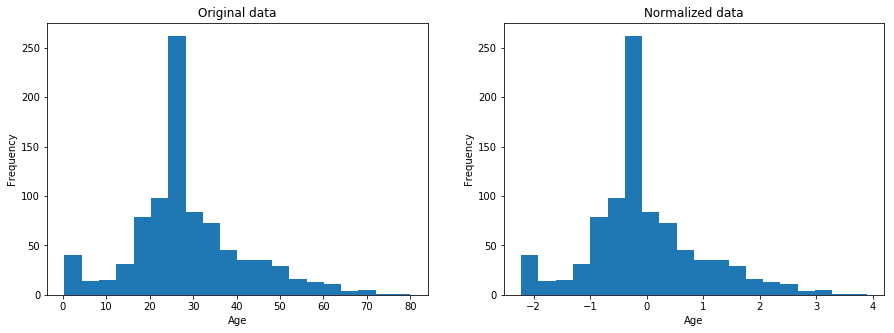

<Figure size 360x360 with 0 Axes>

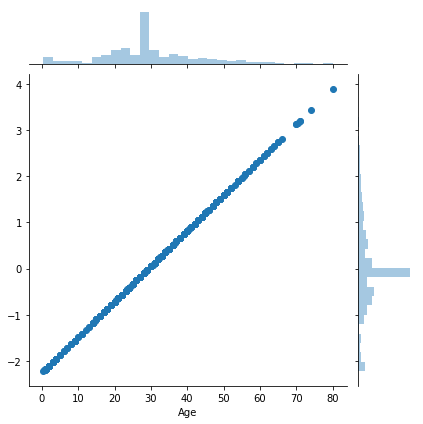

In [130]:
# Plotting data
plots(titanic_sample.Age, titanic_sample_StandardScaler[:,0], "Age")

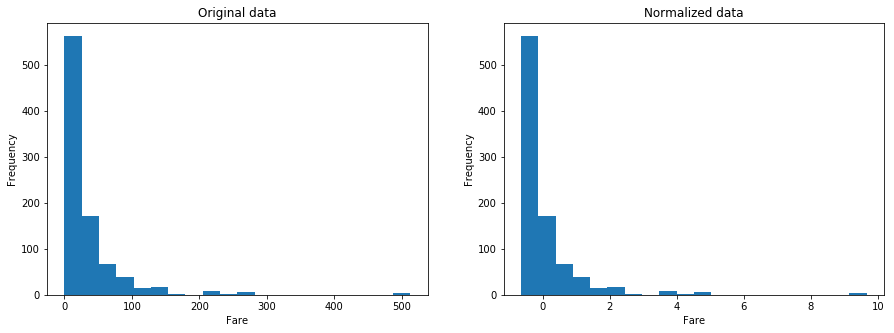

<Figure size 360x360 with 0 Axes>

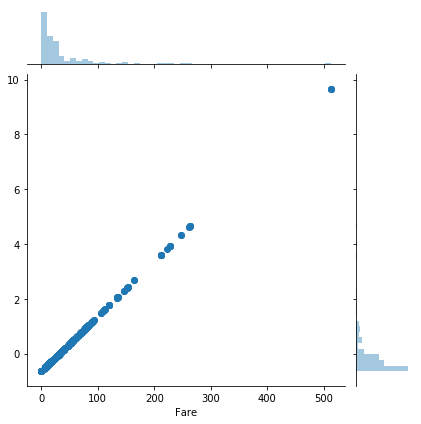

In [131]:
plots(titanic_sample.Fare, titanic_sample_StandardScaler[:,1], "Fare")